In [1]:
import pandas as pd
#import postgreSQL
from geopy.geocoders import Nominatim
import folium
import matplotlib.pyplot as plt

In [2]:
path = 'data/nyc_housing_prices_jul_2020.csv'
with open(path) as f:
    nyc_house_2020 = pd.read_csv(f)

In [3]:
nyc_house_2020

,ï»¿borough,neigborhood,studio,1_bedroom,2_bedroom,3_bedroom
0,manhatan,Chelsea,"$2,794","$4,062","$6,997","$11,031"
1,manhatan,East Village,"$2,608","$3,280","$4,044","$5,289"
2,manhatan,Flatiron/Union Square,"$3,632","$4,645","$8,267","$15,969"
3,manhatan,Gramercy Park,"$2,569","$3,656","$5,413","$7,226"
4,manhatan,Greenwich Village,"$2,828","$4,116","$8,000","$12,418"
5,manhatan,Battery Park City,"$2,823","$3,573","$6,859","$10,574"
6,manhatan,Financial District,"$2,955","$3,965","$6,065","$10,653"
7,manhatan,Lower East Side,"$2,710","$3,524","$4,699","$5,543"
8,manhatan,NoHo,"$5,121","$6,117","$9,678","$16,413"
9,manhatan,NoLiTa/Little Italy,"$2,683","$4,280","$4,833","$10,648"


In [4]:
path = 'data/all_join.csv'
with open(path) as f:
    all_data = pd.read_csv(f)

In [5]:
all_data.columns = ['neighborhood', 'id', 'borough', 'type', 'lat', 'long', 'studio_2020',
                    'br_1_2020', 'br_2_2020', 'br_3_2020', 'studio_2021', 'br_1_2021', 'br_2_2021']

In [6]:
all_data.head()

,neighborhood,id,borough,type,lat,long,studio_2020,br_1_2020,br_2_2020,br_3_2020,studio_2021,br_1_2021,br_2_2021
0,Allerton,nyu_2451_34572.299,Bronx,Point,40.865788,-73.859319,NaN,NaN,NaN,NaN,1450.0,1625.0,1800.0
1,Annadale,nyu_2451_34572.216,Staten Island,Point,40.538114,-74.178549,NaN,NaN,NaN,NaN,NaN,1450.0,NaN
2,Arden Heights,nyu_2451_34572.242,Staten Island,Point,40.549286,-74.185887,NaN,NaN,NaN,NaN,NaN,NaN,2250.0
3,Arlington,nyu_2451_34572.228,Staten Island,Point,40.635325,-74.165104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arrochar,nyu_2451_34572.229,Staten Island,Point,40.596313,-74.067124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
len(all_data)

328

In [8]:
all_data.isnull().sum()

neighborhood      0
id                0
borough           0
type              0
lat               0
long              0
studio_2020     273
br_1_2020       272
br_2_2020       272
br_3_2020       273
studio_2021     192
br_1_2021       137
br_2_2021       125
dtype: int64

In [9]:
all_data.studio_2020.isnull().sum() / (all_data.studio_2020.isnull().sum() + all_data.studio_2020.count())

0.8323170731707317

In [10]:
for column in all_data.columns:
    print(column)

neighborhood
id
borough
type
lat
long
studio_2020
br_1_2020
br_2_2020
br_3_2020
studio_2021
br_1_2021
br_2_2021


In [11]:
all_data.head()

,neighborhood,id,borough,type,lat,long,studio_2020,br_1_2020,br_2_2020,br_3_2020,studio_2021,br_1_2021,br_2_2021
0,Allerton,nyu_2451_34572.299,Bronx,Point,40.865788,-73.859319,NaN,NaN,NaN,NaN,1450.0,1625.0,1800.0
1,Annadale,nyu_2451_34572.216,Staten Island,Point,40.538114,-74.178549,NaN,NaN,NaN,NaN,NaN,1450.0,NaN
2,Arden Heights,nyu_2451_34572.242,Staten Island,Point,40.549286,-74.185887,NaN,NaN,NaN,NaN,NaN,NaN,2250.0
3,Arlington,nyu_2451_34572.228,Staten Island,Point,40.635325,-74.165104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arrochar,nyu_2451_34572.229,Staten Island,Point,40.596313,-74.067124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_data = all_data[['lat', 'long', 'borough', 'neighborhood']].copy()
df_data.columns = ['latitude', 'longitude', 'borough', 'neighborhood']
df_data.head()

,latitude,longitude,borough,neighborhood
0,40.865788,-73.859319,Bronx,Allerton
1,40.538114,-74.178549,Staten Island,Annadale
2,40.549286,-74.185887,Staten Island,Arden Heights
3,40.635325,-74.165104,Staten Island,Arlington
4,40.596313,-74.067124,Staten Island,Arrochar


In [13]:
# get NYC latitude and longitude

address = 'New York City, NY'
location = None

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
nyc_latitude = location.latitude
nyc_longitude = location.longitude

print('The geograpical coordinate of New York City are {}, {}.'.format(nyc_latitude, nyc_longitude))


# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[nyc_latitude, nyc_longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_data['latitude'], df_data['longitude'], df_data['borough'], df_data['neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)

map_newyork

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [14]:
all_data[:1]

,neighborhood,id,borough,type,lat,long,studio_2020,br_1_2020,br_2_2020,br_3_2020,studio_2021,br_1_2021,br_2_2021
0,Allerton,nyu_2451_34572.299,Bronx,Point,40.865788,-73.859319,NaN,NaN,NaN,NaN,1450.0,1625.0,1800.0


Text(0.5, 1.0, '2 Bedroom 2021')

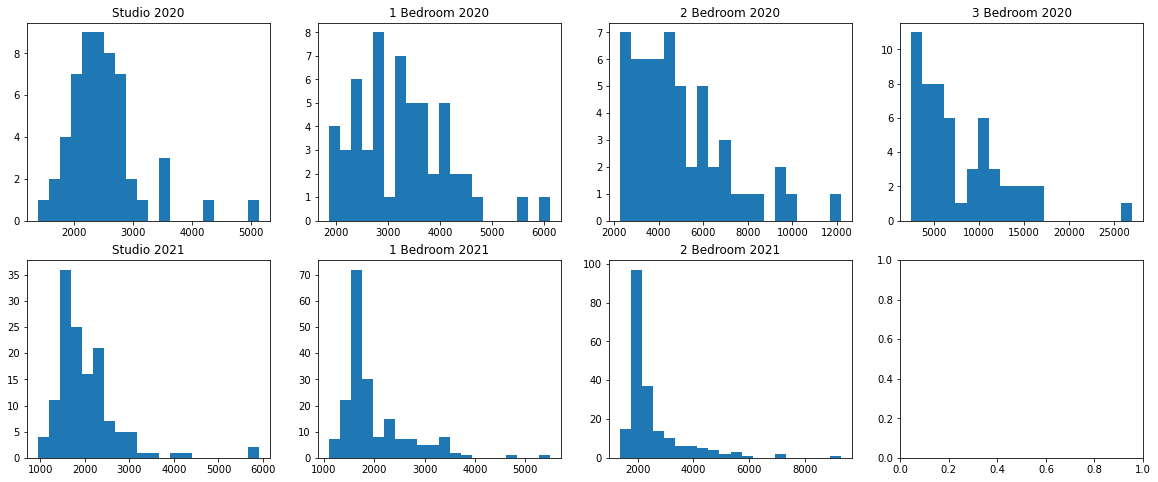

In [15]:

fig, axs = plt.subplots(2, 4, figsize=(20,8))

axs[0, 0].hist(all_data['studio_2020'], 20)
axs[0, 0].set_title('Studio 2020')
axs[0, 1].hist(all_data['br_1_2020'], 20)
axs[0, 1].set_title('1 Bedroom 2020')
axs[0, 2].hist(all_data['br_2_2020'], 20)
axs[0, 2].set_title('2 Bedroom 2020')
axs[0, 3].hist(all_data['br_3_2020'], 20)
axs[0, 3].set_title('3 Bedroom 2020')

axs[1, 0].hist(all_data['studio_2021'], 20)
axs[1, 0].set_title('Studio 2021')
axs[1, 1].hist(all_data['br_1_2021'], 20)
axs[1, 1].set_title('1 Bedroom 2021')
axs[1, 2].hist(all_data['br_2_2021'], 20)
axs[1, 2].set_title('2 Bedroom 2021')
#axs[0, 3].hist(all_data['br_3_2020'], 20)
#axs[0, 3].set_title('3 Bedroom 2020')


#for ax in axs.flat:
#    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()
#fig.show()

In [16]:
bronx = all_data[all_data['borough']=='Bronx']

In [17]:
#bronx[2020] = 2020
#bronx[2021] = 2021

In [18]:
bronx.head()

,neighborhood,id,borough,type,lat,long,studio_2020,br_1_2020,br_2_2020,br_3_2020,studio_2021,br_1_2021,br_2_2021
0,Allerton,nyu_2451_34572.299,Bronx,Point,40.865788,-73.859319,NaN,NaN,NaN,NaN,1450.0,1625.0,1800.0
14,Baychester,nyu_2451_34572.11,Bronx,Point,40.866858,-73.835798,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Bedford Park,nyu_2451_34572.14,Bronx,Point,40.870185,-73.885512,NaN,NaN,NaN,NaN,1413.0,1525.0,2100.0
24,Belmont,nyu_2451_34572.35,Bronx,Point,40.857277,-73.888452,NaN,NaN,NaN,NaN,NaN,1650.0,1856.0
38,Bronxdale,nyu_2451_34572.298,Bronx,Point,40.852723,-73.861726,NaN,NaN,NaN,NaN,NaN,NaN,NaN


NameError: name 'bron2020' is not defined

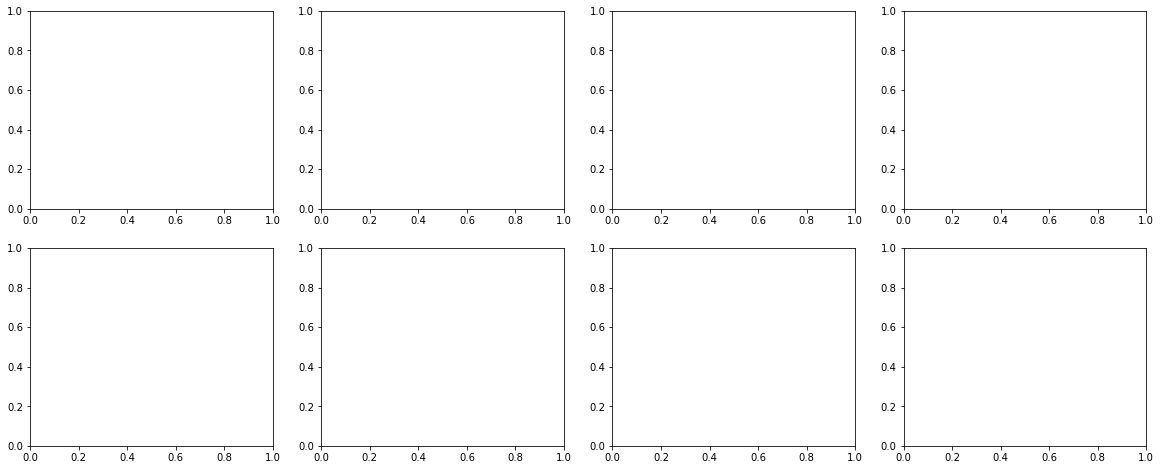

In [19]:
fig, axs = plt.subplots(2, 4, figsize=(20,8))

axs[0, 0].scatter(bronx['studio_2020'], bron2020)
axs[0, 0].set_title('Studio 2020')
axs[0, 1].scatter(all_data['br_1_2020'], 2020)
axs[0, 1].set_title('1 Bedroom 2020')
axs[0, 2].hist(all_data['br_2_2020'], 20)
axs[0, 2].set_title('2 Bedroom 2020')
axs[0, 3].hist(all_data['br_3_2020'], 20)
axs[0, 3].set_title('3 Bedroom 2020')

axs[1, 0].hist(all_data['studio_2021'], 20)
axs[1, 0].set_title('Studio 2021')
axs[1, 1].hist(all_data['br_1_2021'], 20)
axs[1, 1].set_title('1 Bedroom 2021')
axs[1, 2].hist(all_data['br_2_2021'], 20)
axs[1, 2].set_title('2 Bedroom 2021')